
# Predicting Subsciption Status of Mincecraft Players Based on the Hours Played and Age


### Intro

The data being utilized in the following report was collected by a team of researchers at the University of British Columbia, led by Frank Wood. The aim of collecting the data was to predict how people play video games (through various factors). The particular video game being played is Minecraft (which is an open world simulation game, in which players maneuver through a world made of blocks – they may encounter enemies, build large structures, or just adventure).<br>
<br>
The gathered data consists of 2 files:<br>
(a) a file containing a list of all unique players, which includes data about each player, and <br>
(b) a file containing a list of individual playing sessions, which includes data about each session. <br>
However, for the purpose of our report, we will only be utilizing the data from the players file. <br>

> The players dataset consists of the following columns: <br>
> 1. Experience
> 2. Subscription
> 3. Email (Hashed Form)
> 4. Hours Played
> 5. Name of Player
> 6. Gender of Player
> 7. Age of Player

For the purpose of this report, we will only be focusing on 3 of the columns. These three columns are Age, Hours Played, and Subscription. The reason for this is that we will use 2 columns with quantitative data (Age and Hours Played) to predict a categorical value in the Subscription column.

> **The Question we will be trying to Answer:** <br>
*Can the Age and Hours Played of a Player predict the said player's Subscription status?*

### Wrangling & Cleaning The Data

The following code loads the necessary libraries for data-analysis.

In [14]:
library(tidyverse)
library(tidymodels)
library(digest)

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Dig deeper into tidy modeling with R at https://www.tmwr.org



Firstly, we will be loading the *players* dataset and storing it in a variable called *players*. This is done in the following code:

In [2]:
players <- read_csv("players.csv")

# Since the dataset is quite large, the head function shows the first few rows of data
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


Next, to investigate our particular question (stated in the **Introduction** section), we will clean the data so that it only consists of the columns we desire for analysis. 

In [3]:
# We only require the subscribe, played_hours, and Age columns
players_cleaned <- players |> 
                select(subscribe, played_hours, Age)

head(players_cleaned)

subscribe,played_hours,Age
<lgl>,<dbl>,<dbl>
TRUE,30.3,9
TRUE,3.8,17
FALSE,0.0,17
TRUE,0.7,21
TRUE,0.1,21
TRUE,0.0,17


**An Important Note**
>After closely looking at the data, we realize that the *subscribe* column consists of either TRUE or FALSE values. This is categorical data, as it's separated into 2 categories: *TRUE or FALSE*. Therefore, we can convert this column to factor, to ensure that R treats it correctly in summaries, visualizations, modelling etc.

To do this, we need to first load the dplyr library, and then use the mutate function to change the subscribe column.

In [4]:
# Run this cell to load the dplyr library
library(dplyr)

We then mutate the column:

In [5]:
# Run the following cell to convert subscribe to factor through mutation
players_mutated <- players_cleaned |>
        mutate(subscribe = as.factor(subscribe))

head(players_mutated)

subscribe,played_hours,Age
<fct>,<dbl>,<dbl>
TRUE,30.3,9
TRUE,3.8,17
FALSE,0.0,17
TRUE,0.7,21
TRUE,0.1,21
TRUE,0.0,17


### Creating Initial Visualizations

Before we can perform any data analysis, we need to create some initial visualizations to see if we can spot any trends in the data. To do this, we can create an array of plots that can help us better understand that data.

> **(1)** Visualizing Boxplots for the Data:

**Boxplot for Age by Subscription Status**

Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


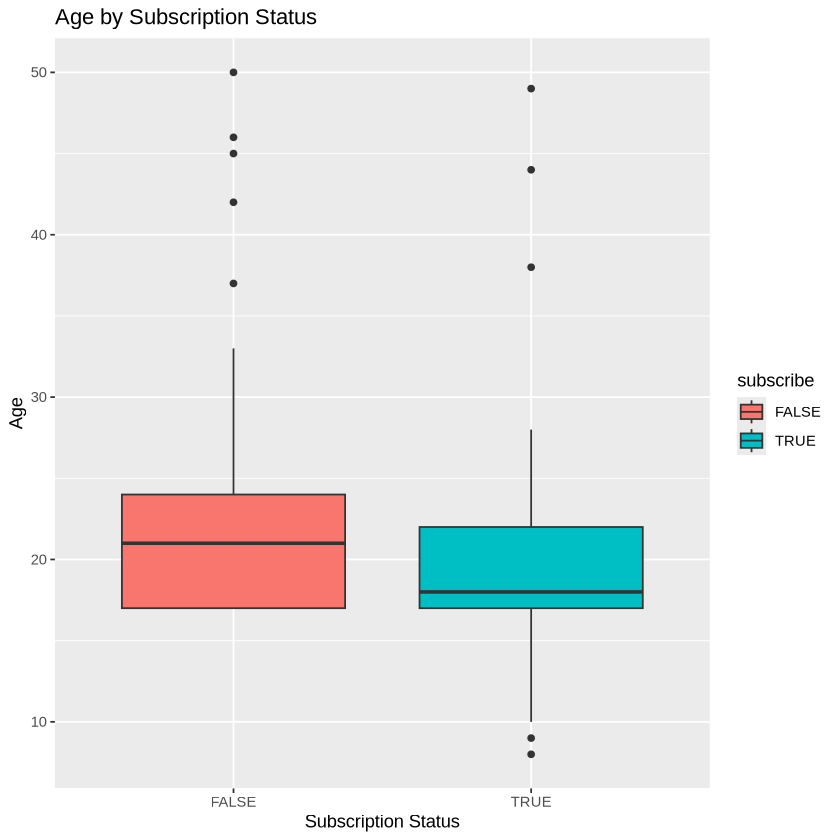

In [6]:
boxplot_age <- ggplot(players_mutated, aes(x = subscribe, y = Age, fill = subscribe)) + 
            geom_boxplot() + 
            labs(title = "Age by Subscription Status", x = "Subscription Status", y = "Age")

boxplot_age

This boxplot tells us that when we plot Age by Subscription status, the median age of non-subscribed players is higher. Furthermore, we can spot that both the categories have outliers. However, the subscribed category is the only category with young outliers in the age range of 5 to 10. This indicates that younger players might have a higher liklihood of being subscribed.

**Boxplot for Played Hours by Subscription Status**

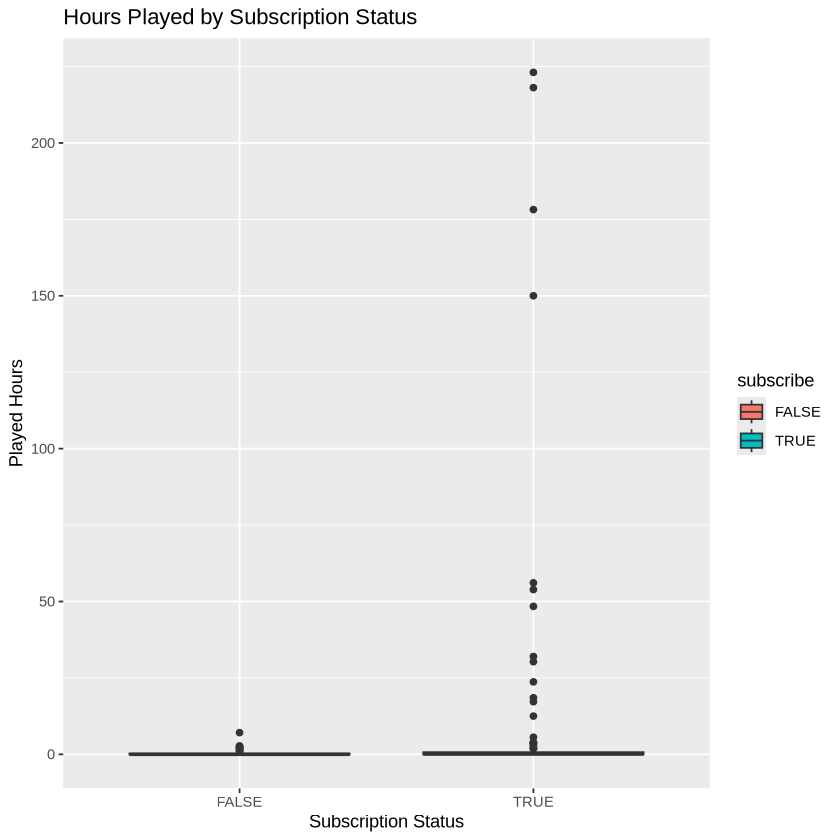

In [7]:
boxplot_hours_played <- ggplot(players_mutated, aes(x = subscribe, y = played_hours, fill = subscribe)) + 
                    geom_boxplot() + 
                    labs(title = "Hours Played by Subscription Status", x = "Subscription Status", y = "Played Hours")

boxplot_hours_played

We can see that plotting a boxplot for Hours Played by Subscription status doesn't tell us much, except for the fact that most players dont play for a long time. Other than that, it tells us that Subscribed Players tend to play a greater number of hours. To better visualize this relationship, we can apply logarithmic scaling to the y-axis.

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 85 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


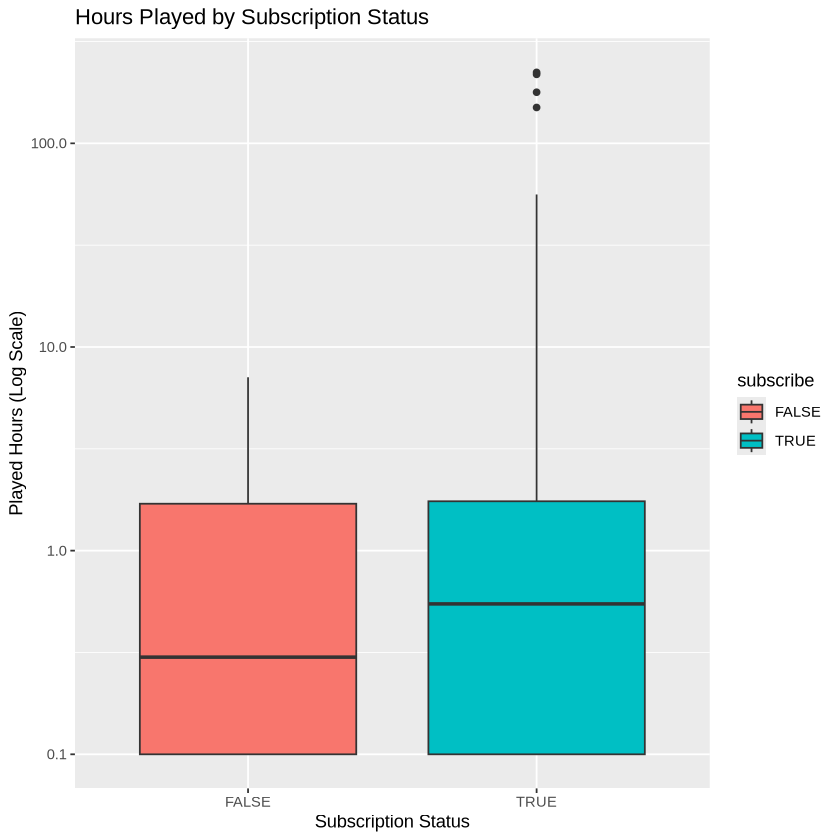

In [8]:
boxplot_hours_played_scaled <- ggplot(players_mutated, aes(x = subscribe, y = played_hours, fill = subscribe)) + 
                            geom_boxplot() + 
                            scale_y_log10() +
                            labs(title = "Hours Played by Subscription Status", x = "Subscription Status", y = "Played Hours (Log Scale)")

boxplot_hours_played_scaled

This makes the visualization easier to interpret, yet it still provides us with the same information: Outliers show us that subscribed players are more likely to be players that have played longer amounts of time. The median amount of time played is similar between subscribed players and non-subscribed players.

> **(2)** Visualizing Histograms for the Data

**Histogram for Age by Subscription Status**

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


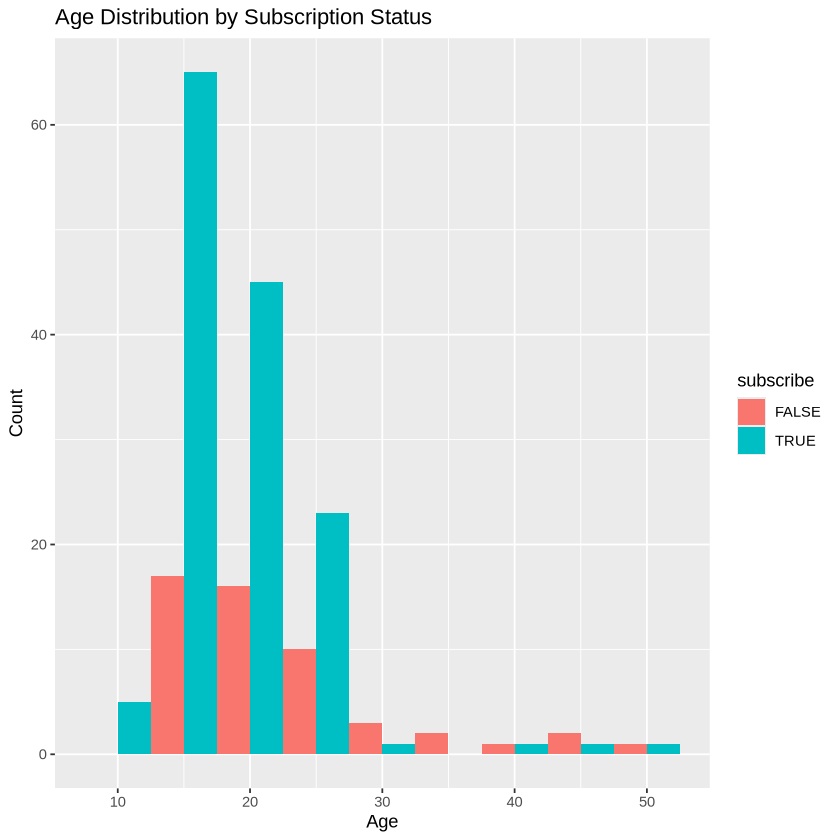

In [9]:
histogram_age <- ggplot(players_mutated, aes(x = Age, fill = subscribe)) +  
            geom_histogram(binwidth = 5, position = "dodge") +  
            labs(title = "Age Distribution by Subscription Status", x = "Age", y = "Count")  

histogram_age

The above histogram tells us that the number of individuals that are subscribed outnumber that number of individuals that are not subscribed in nearly every age group. However, the number of individuals that are subscribed tend to decrease in number after the age of 15. The ratio between subscribed and non-subscribed balances out in older age groups.

**Histogram for Hours Played by Subscription Status**

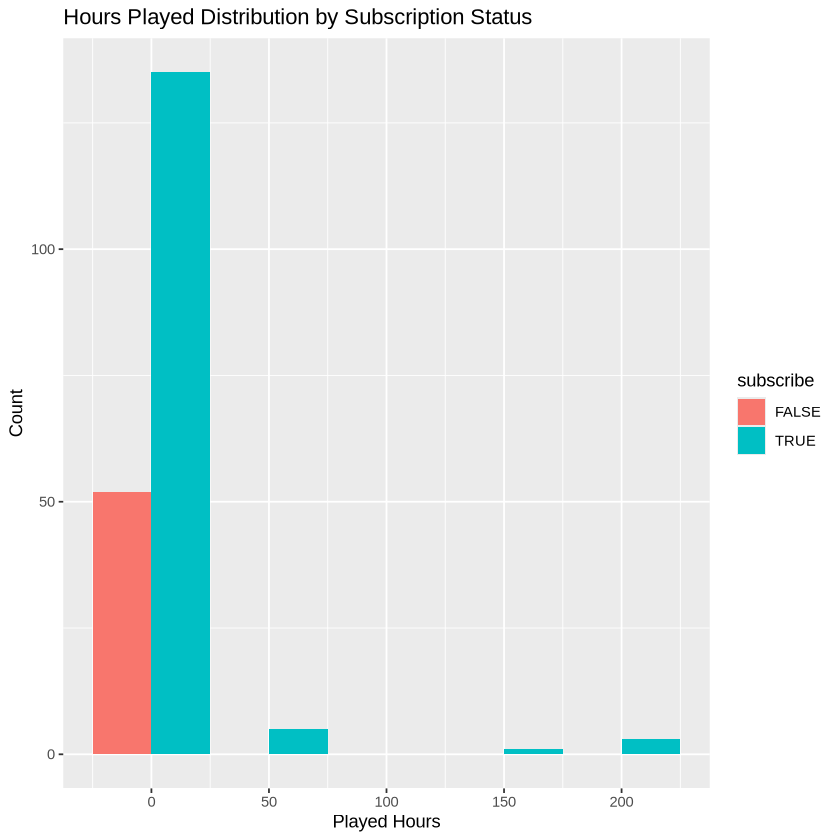

In [10]:
histogram_hours_played <- ggplot(players_mutated, aes(x = played_hours, fill = subscribe)) +  
                    geom_histogram(binwidth = 50, position = "dodge") +
                    labs(title = "Hours Played Distribution by Subscription Status", x = "Played Hours", y = "Count")

histogram_hours_played

The plot above indicates that a greater number of played hours relates to a positive subscription status. We can apply scaling to the x-axis to solidify this indication.

Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 85 rows containing non-finite outside the scale range (`stat_bin()`).”


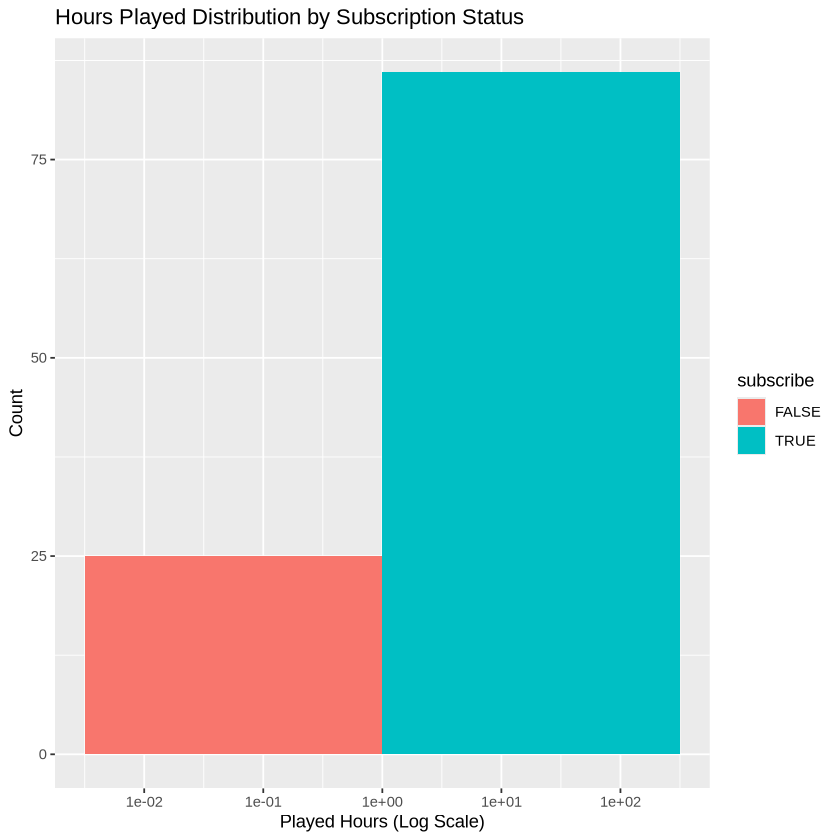

In [11]:
histogram_hours_played_scaled <- ggplot(players_mutated, aes(x = played_hours, fill = subscribe)) +  
                            geom_histogram(binwidth = 5, position = "dodge") +  
                            scale_x_log10() +
                            labs(title = "Hours Played Distribution by Subscription Status", x = "Played Hours (Log Scale)", y = "Count")  

histogram_hours_played_scaled

This solidifies our initial prediction regarding the relationship between played hours and subscription; that a greater number of played hours indicates a positive subscription status. The next step is to create our training and trial data sets from the available data.

In [18]:
player_split <- initial_split(players_mutated, prop = 0.75, strata = subscribe)
player_train <- training(player_split)
player_test <- testing(player_split)

Now it is time to check the proportions of the data sets.

In [22]:
player_proportions <- players_mutated |>
                      group_by(subscribe) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(players_mutated))
player_proportions

subscribe,n,percent
<fct>,<int>,<dbl>
FALSE,52,26.53061
TRUE,144,73.46939


In [20]:
subscribe_proportions <- player_train |>
                      group_by(subscribe) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(player_train))
subscribe_proportions

subscribe,n,percent
<fct>,<int>,<dbl>
FALSE,39,26.53061
TRUE,108,73.46939


It can be seen the ratio of subscribed to non subscribed players is a similar proportion in the original data and training data. This is a good sign and is thus a usable training set. The next step is to scale the data so the variables have the same weight in the K-nearest neighbour equation.

In [24]:
subscribe_recipe <- recipe(subscribe ~ Age + played_hours, data = players_mutated) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

In [26]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(subscribe_recipe) |>
  add_model(knn_spec) |>
  fit(data = player_train)

knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(3,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3310345
Best kernel: rectangular
Best k: 3

We now have a base recipe, but is this the most accurate model? To ensure we have the best model possible, we split the train data to tune our K value.

In [60]:
player_vfold <- vfold_cv(player_train, v = 5, strata = subscribe)

vfold_recipe <- recipe(subscribe ~ Age + played_hours,
                                   data = player_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

knn_fit <- workflow() |>
  add_recipe(vfold_recipe) |>
  add_model(knn_spec) |>
  fit_resamples(resamples = player_vfold)

knn_fit |>
  collect_metrics()

→ A | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 29 rows.
               ✖ Assigned data has 30 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 30 to size 29.

There were issues with some computations   A: x1

→ B | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 28 rows.
               ✖ Assigned data has 29 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 29 to size 28.

There were issues with some computations   A: x1
There were issues with some computations   A: x1   B: x1





.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
accuracy,binary,0.7388889,3,0.005555556,Preprocessor1_Model1
roc_auc,binary,0.5944715,3,0.053758556,Preprocessor1_Model1


Next we test to find the best K value.

In [61]:
knn_spec <- nearest_neighbor(weight_func = "rectangular",
                             neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

knn_results <- workflow() |>
  add_recipe(subscribe_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = player_vfold, grid = k_vals) |>
  collect_metrics()

accuracies <- knn_results |>
  filter(.metric == "accuracy")

accuracies

→ A | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 29 rows.
               ✖ Assigned data has 30 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 30 to size 29.

There were issues with some computations   A: x1

→ B | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 28 rows.
               ✖ Assigned data has 29 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 29 to size 28.

There were issues with some computations   A: x1
There were issues with some computations   A: x1   B: x1

There were issues with some computations   A: x1   B: x1





neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.5325397,3,0.051440573,Preprocessor1_Model01
6,accuracy,binary,0.7031746,3,0.100840509,Preprocessor1_Model02
11,accuracy,binary,0.7380952,3,0.015307382,Preprocessor1_Model03
16,accuracy,binary,0.7500000,3,0.009622504,Preprocessor1_Model04
21,accuracy,binary,0.7388889,3,0.005555556,Preprocessor1_Model05
26,accuracy,binary,0.7388889,3,0.005555556,Preprocessor1_Model06
31,accuracy,binary,0.7388889,3,0.005555556,Preprocessor1_Model07
36,accuracy,binary,0.7388889,3,0.005555556,Preprocessor1_Model08
41,accuracy,binary,0.7388889,3,0.005555556,Preprocessor1_Model09


Next we visualize the K values to find the best value.

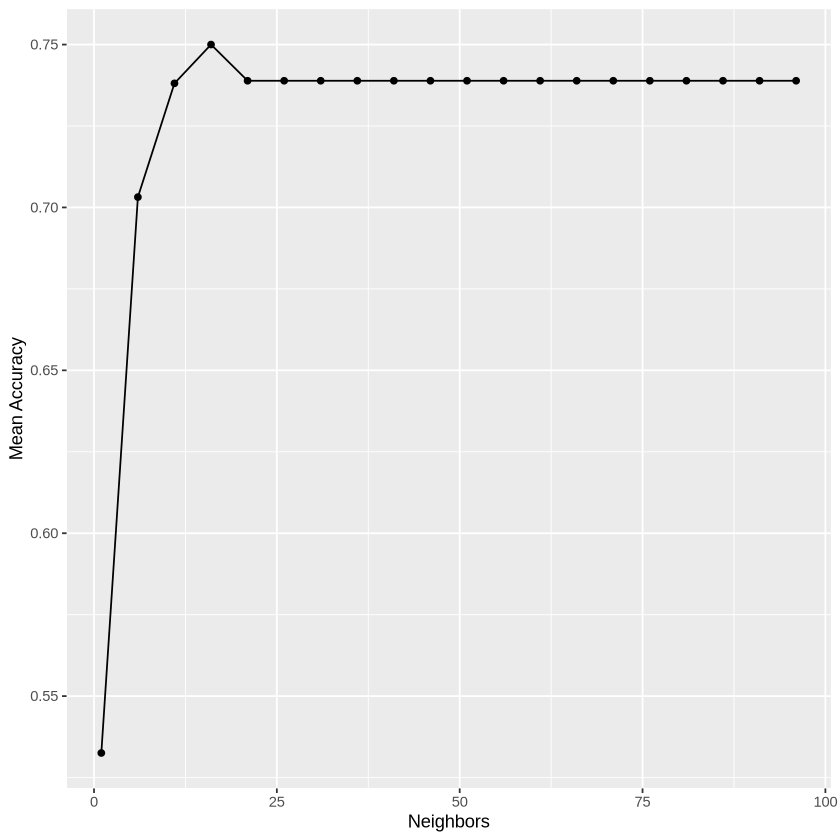

In [66]:
k_graph <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Mean Accuracy") 
k_graph

In [63]:
best_k <- accuracies |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
best_k

[1] 16

From this, the top accuracy will come from a K value of 26. We can then plug this value back inot our original recipe.

In [67]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 16) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(subscribe_recipe) |>
  add_model(knn_spec) |>
  fit(data = player_train)

knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(16,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2413793
Best kernel: rectangular
Best k: 16

In [69]:
subscribe_test_predictions <- predict(knn_fit, player_test) |>
  bind_cols(player_test)

subscribe_test_predictions |>
  metrics(truth = subscribe, estimate = .pred_class) |>
  filter(.metric == "accuracy")


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6938776


In [70]:
confusion <- subscribe_test_predictions |>
             conf_mat(truth = subscribe, estimate = .pred_class)
confusion

          Truth
Prediction FALSE TRUE
     FALSE     1    3
     TRUE     12   33

While this is an ok model, it is worth trying vfold= 10 to see if that will increase the accuracy

In [75]:
player_vfold <- vfold_cv(player_train, v = 10, strata = subscribe)

vfold_recipe <- recipe(subscribe ~ Age + played_hours,
                                   data = player_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

knn_fit <- workflow() |>
  add_recipe(vfold_recipe) |>
  add_model(knn_spec) |>
  fit_resamples(resamples = player_vfold)

knn_fit |>
  collect_metrics()

ERROR: [1m[33mError[39m:[22m
[33m![39m 1 argument has been tagged for tuning in this component: model_spec. 
Please use one of the tuning functions (e.g. `tune_grid()`) to optimize them.


In [76]:
knn_spec <- nearest_neighbor(weight_func = "rectangular",
                             neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

knn_results <- workflow() |>
  add_recipe(subscribe_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = player_vfold, grid = k_vals) |>
  collect_metrics()

accuracies <- knn_results |>
  filter(.metric == "accuracy")

accuracies

→ A | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 14 rows.
               ✖ Assigned data has 15 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 15 to size 14.

There were issues with some computations   A: x1

→ B | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 13 rows.
               ✖ Assigned data has 14 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 14 to size 13.

There were issues with some computations   A: x1
There were issues with some computations   A: x1   B: x1





neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.5839744,8,0.024217587,Preprocessor1_Model01
6,accuracy,binary,0.6532051,8,0.041615917,Preprocessor1_Model02
11,accuracy,binary,0.7461538,8,0.008882312,Preprocessor1_Model03
16,accuracy,binary,0.7294872,8,0.010013141,Preprocessor1_Model04
21,accuracy,binary,0.7378205,8,0.004487179,Preprocessor1_Model05
26,accuracy,binary,0.7544872,8,0.010854256,Preprocessor1_Model06
31,accuracy,binary,0.7378205,8,0.004487179,Preprocessor1_Model07
36,accuracy,binary,0.7378205,8,0.004487179,Preprocessor1_Model08
41,accuracy,binary,0.7378205,8,0.004487179,Preprocessor1_Model09


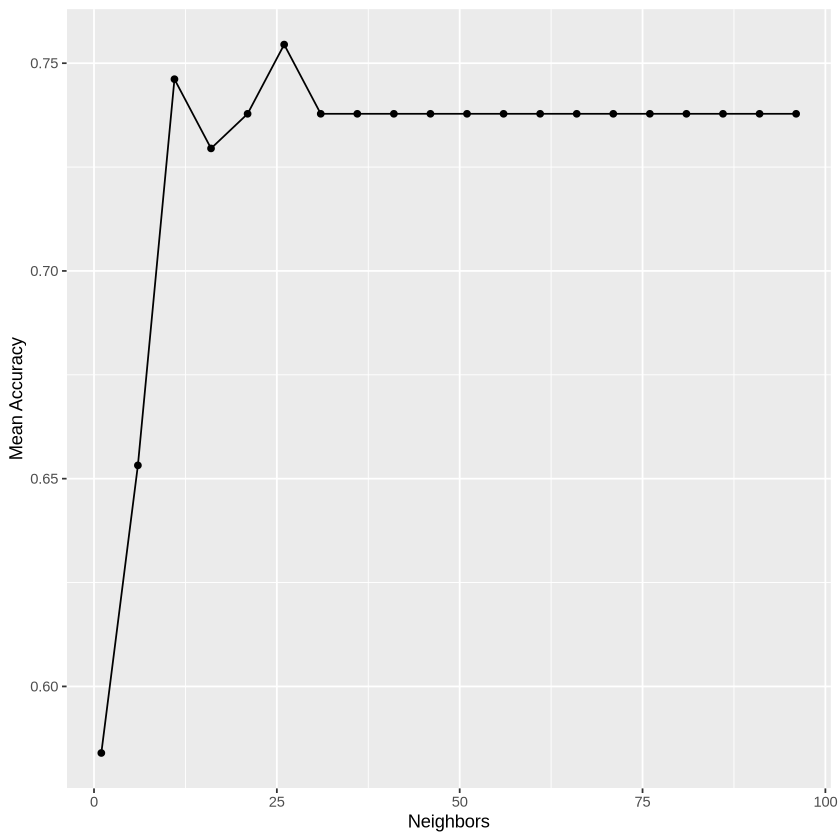

In [77]:
k_graph <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Mean Accuracy") 
k_graph

In [78]:
best_k <- accuracies |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
best_k

[1] 26

In [80]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 26) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(subscribe_recipe) |>
  add_model(knn_spec) |>
  fit(data = player_train)

knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(26,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2689655
Best kernel: rectangular
Best k: 26

In [81]:
subscribe_test_predictions <- predict(knn_fit, player_test) |>
  bind_cols(player_test)

subscribe_test_predictions |>
  metrics(truth = subscribe, estimate = .pred_class) |>
  filter(.metric == "accuracy")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7346939


In [82]:
confusion <- subscribe_test_predictions |>
             conf_mat(truth = subscribe, estimate = .pred_class)
confusion

          Truth
Prediction FALSE TRUE
     FALSE     0    0
     TRUE     13   36

Based on the increased accuracy, the K value with the best results is K = 26. This gives a model with a 73.47% accuracy.